1.  Опишите  процесс  построения  панорамных  изображений  и  мозаики  с 
использованием  алгоритмов  совмещения  изображений.  Как  выбор  модели 
преобразования влияет на конечный результат? Приведите примеры, как прямое 
выравнивание  и  алгоритм  детектора  углов  Харриса  используются  для 
улучшения качества совмещения. В чём состоит вклад алгоритма RANSAC в 
процесс построения мозаики? 
2.  Примените  алгоритм  k-средних  для  сегментации  изображений  на  основе 
цветовых характеристик.

Построение панорам включает обнаружение ключевых точек, сопоставление и сшивание изображений.

- Сбор изображений: Захват нескольких изображений с перекрывающимися областями.

- Обнаружение ключевых точек: Использование алгоритмов (например, SIFT, SURF) для нахождения характерных точек на изображениях.

- Сопоставление ключевых точек: Поиск соответствий между точками на разных изображениях.

- Оценка преобразования: Вычисление модели преобразования (например, аффинного или проективного) для совмещения изображений.

- Сшивание изображений: Наложение изображений с учётом вычисленного преобразования и устранение швов (например, с помощью блендинга).

Модель преобразования (аффинная или проективная) влияет на точность совмещения.

- Аффинное преобразование: Включает масштабирование, вращение, сдвиг и наклон. Подходит для плоских сцен с небольшими искажениями.

- Проективное преобразование (гомография): Учитывает перспективные искажения. Подходит для сцен с глубиной (например, панорамы с большим углом обзора).

Прямое выравнивание и детектор углов Харриса улучшают начальное совмещение.

Прямое выравнивание:
- Используется для точного совмещения изображений на основе минимизации разницы между пикселями. Например, метод Lucas-Kanade для оптического потока.

Детектор углов Харриса:
- Обнаруживает углы и характерные точки на изображениях, которые используются для сопоставления.


RANSAC устраняет выбросы, повышая качество мозаики.

- RANSAC случайно выбирает подмножество точек, строит модель преобразования и проверяет, сколько точек ей соответствуют.
- Удаляет ложные совпадения, что улучшает качество совмещения.

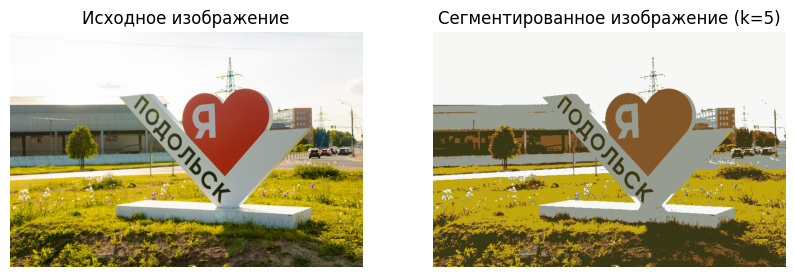

In [17]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

image = cv2.imread('./data/RANSAC/RANSAC2.jpg')

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

pixels = image.reshape(-1, 3)

k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(pixels)

centroids = kmeans.cluster_centers_.astype(int)
labels = kmeans.labels_

segmented_image = centroids[labels].reshape(image.shape)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Исходное изображение')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(segmented_image)
plt.title(f'Сегментированное изображение (k={k})')
plt.axis('off')

plt.show()